In [50]:
#Include documentation for moons class
from moons import Moons
import seaborn as sns

C:\Users\isaac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


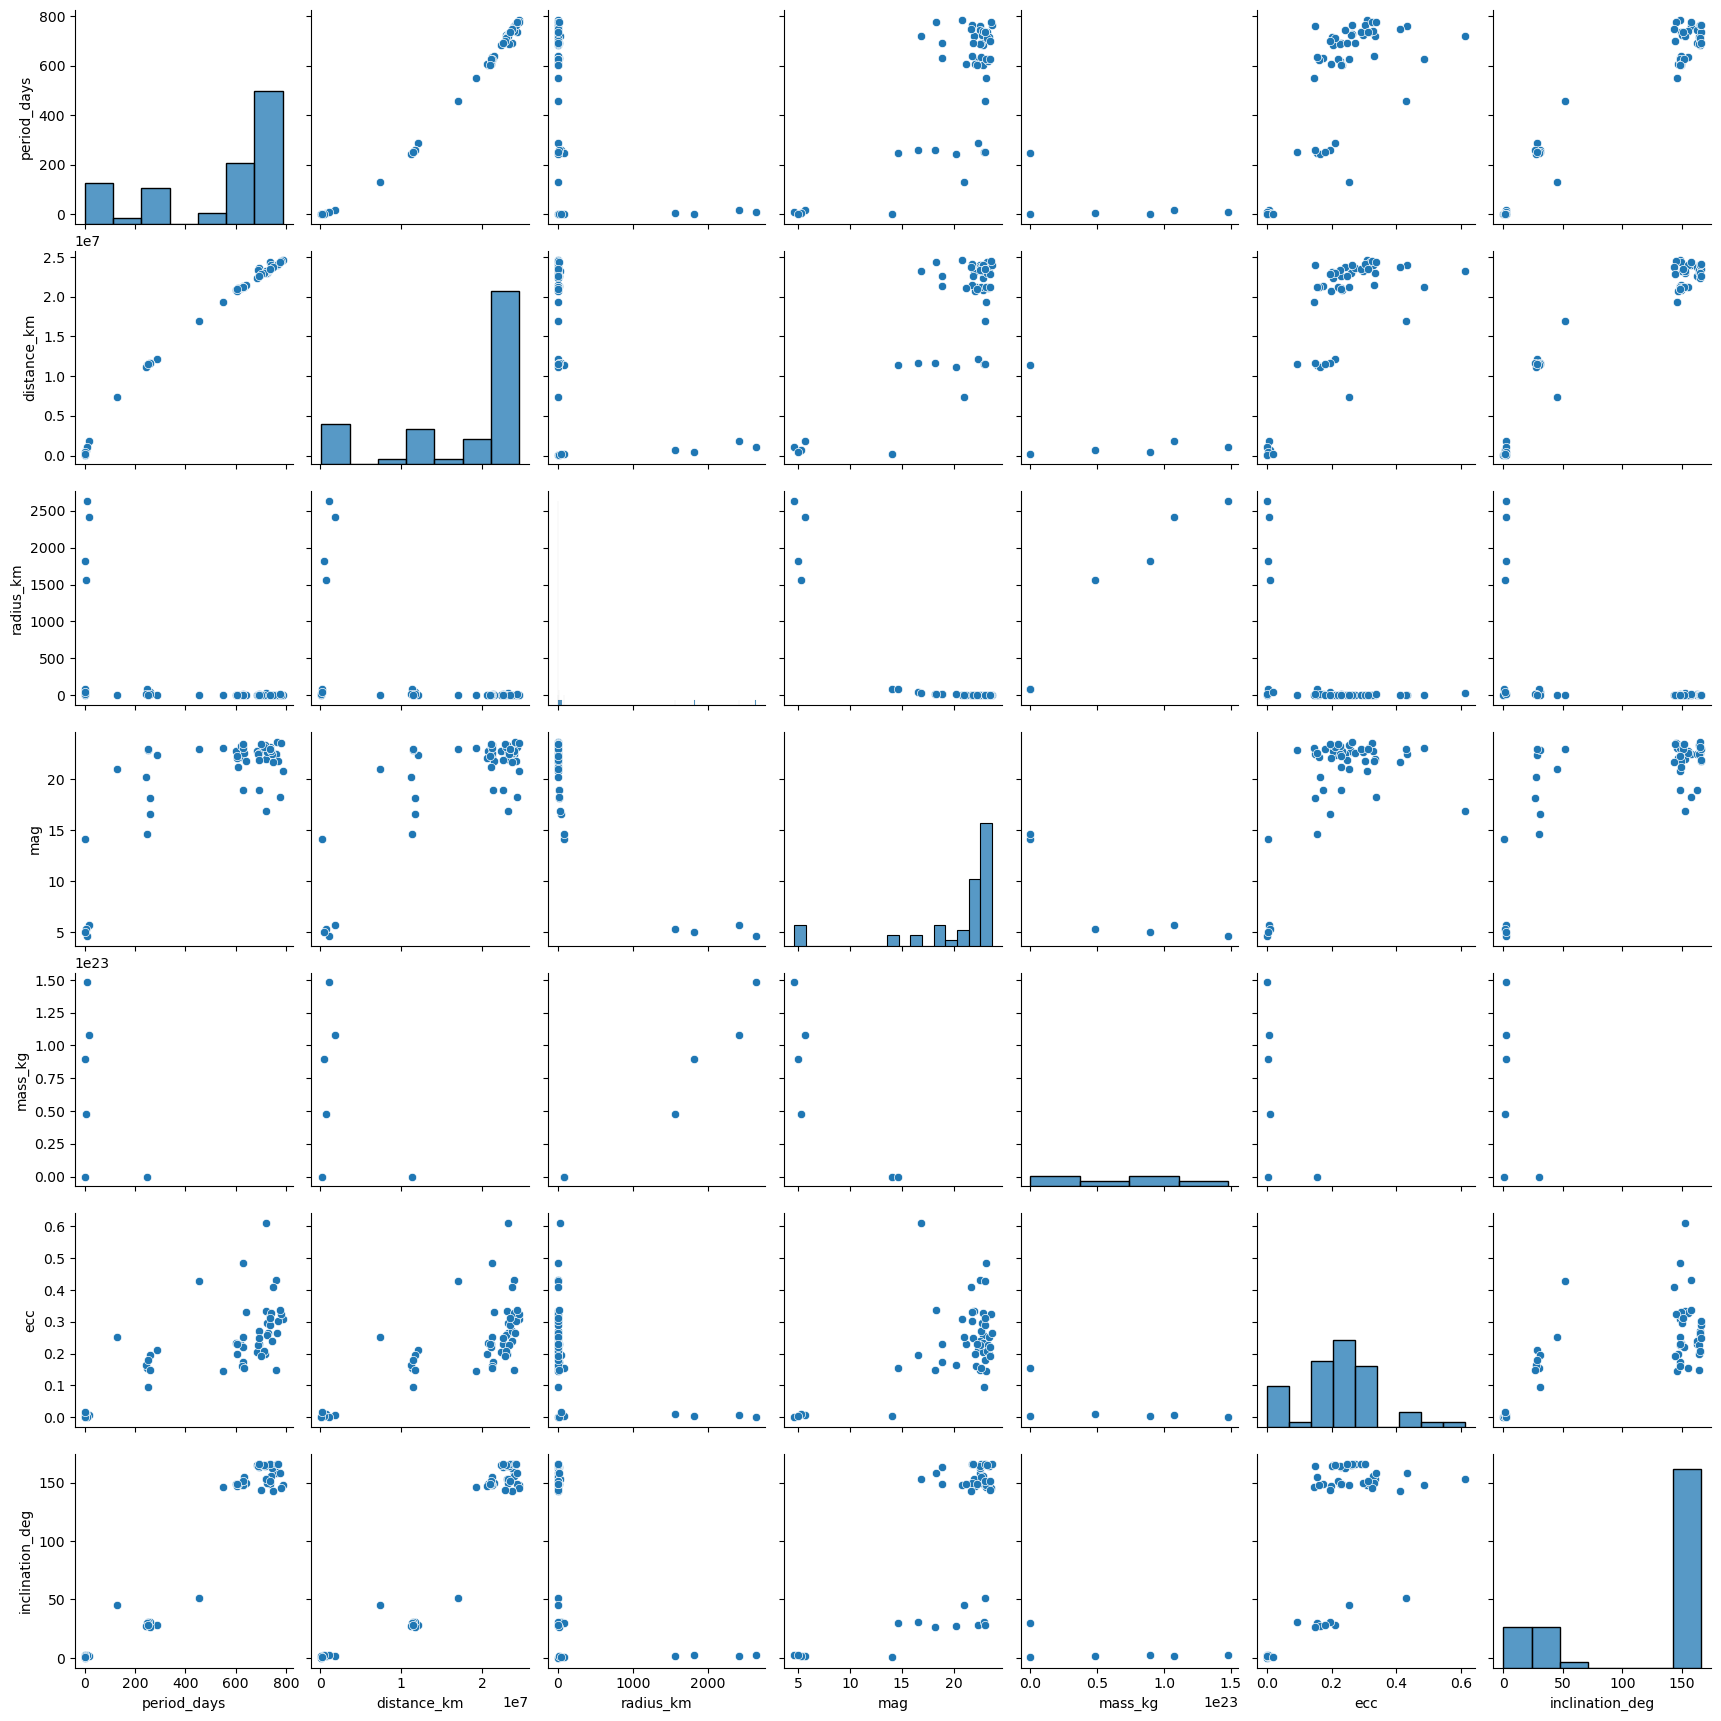

In [51]:
test = Moons()
test.data
sns.pairplot(test.data)
#test.data.plot("period_days","distance_km", "scatter")

#test.data.groupby("group").mean()
